In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
import joblib
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler




In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/cbeloni/datasaude-ml/refs/heads/main/Regressao/dados_treino_v8.csv', sep='|')
df.head()

,internacao,DT_ATENDIMENTO,MP10,O3,TEMP,UR,DS_CID,outono,inverno,primavera,verao,MENOR_1_ANO,ENTRE_1_4_ANOS,ENTRE_5_9_ANOS,ENTRE_10_14_ANOS,ENTRE_15_18_ANOS,TP_SEXO
0,0,2022-01-01,28.620098,31.930049,21.833099,80.276419,AMIGDALITE AGUDA NAO ESPECIFICADA,0,0,0,1,0,0,0,0,1,F
1,0,2022-01-01,22.559984,28.459289,21.524707,81.938460,ASMA NAO ESPECIFICADA,0,0,0,1,0,1,0,0,0,M
2,0,2022-01-01,23.173989,29.115721,20.771323,87.768694,BRONQUIOLITE AGUDA,0,0,0,1,1,0,0,0,0,M
3,1,2022-01-01,29.538983,30.253300,21.908878,79.161412,BRONQUIOLITE AGUDA DEVIDA A VIRUS SINCICIAL RE...,0,0,0,1,1,0,0,0,0,F
4,0,2022-01-01,33.311234,26.157899,21.339680,81.960879,BRONQUITE AGUDA NAO ESPECIFICADA,0,0,0,1,0,1,0,0,0,M


In [3]:
df = pd.get_dummies(df, columns=["TP_SEXO", "DS_CID"], dtype='int')
df.head()

,internacao,DT_ATENDIMENTO,MP10,O3,TEMP,UR,outono,inverno,primavera,verao,...,DS_CID_SIDEROSE,DS_CID_SINUSITE AGUDA,DS_CID_SINUSITE AGUDA NAO ESPECIFICADA,DS_CID_SINUSITE CRONICA,DS_CID_SINUSITE CRONICA NAO ESPECIFICADA,DS_CID_SINUSITE ESFENOIDAL AGUDA,DS_CID_SINUSITE FRONTAL AGUDA,DS_CID_SINUSITE MAXILAR AGUDA,DS_CID_TRANSTORNO RESPIRATORIO NAO ESPECIFICADOS,DS_CID_TRAQUEITE AGUDA
0,0,2022-01-01,28.620098,31.930049,21.833099,80.276419,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,2022-01-01,22.559984,28.459289,21.524707,81.938460,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,2022-01-01,23.173989,29.115721,20.771323,87.768694,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,2022-01-01,29.538983,30.253300,21.908878,79.161412,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,2022-01-01,33.311234,26.157899,21.339680,81.960879,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
headers = list(df.columns)[2:]
X = df[headers]
y = df['internacao']
df[headers].head()

,MP10,O3,TEMP,UR,outono,inverno,primavera,verao,MENOR_1_ANO,ENTRE_1_4_ANOS,...,DS_CID_SIDEROSE,DS_CID_SINUSITE AGUDA,DS_CID_SINUSITE AGUDA NAO ESPECIFICADA,DS_CID_SINUSITE CRONICA,DS_CID_SINUSITE CRONICA NAO ESPECIFICADA,DS_CID_SINUSITE ESFENOIDAL AGUDA,DS_CID_SINUSITE FRONTAL AGUDA,DS_CID_SINUSITE MAXILAR AGUDA,DS_CID_TRANSTORNO RESPIRATORIO NAO ESPECIFICADOS,DS_CID_TRAQUEITE AGUDA
0,28.620098,31.930049,21.833099,80.276419,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,22.559984,28.459289,21.524707,81.938460,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,23.173989,29.115721,20.771323,87.768694,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,29.538983,30.253300,21.908878,79.161412,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,33.311234,26.157899,21.339680,81.960879,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
colunas_normalizar = ['MP10', 'O3', 'TEMP', 'UR']
X.loc[:, colunas_normalizar] = scaler.fit_transform(X.loc[:, colunas_normalizar])
X[headers].head()


,MP10,O3,TEMP,UR,outono,inverno,primavera,verao,MENOR_1_ANO,ENTRE_1_4_ANOS,...,DS_CID_SIDEROSE,DS_CID_SINUSITE AGUDA,DS_CID_SINUSITE AGUDA NAO ESPECIFICADA,DS_CID_SINUSITE CRONICA,DS_CID_SINUSITE CRONICA NAO ESPECIFICADA,DS_CID_SINUSITE ESFENOIDAL AGUDA,DS_CID_SINUSITE FRONTAL AGUDA,DS_CID_SINUSITE MAXILAR AGUDA,DS_CID_TRANSTORNO RESPIRATORIO NAO ESPECIFICADOS,DS_CID_TRAQUEITE AGUDA
0,0.217744,0.254960,0.688959,0.771206,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.167354,0.225945,0.674581,0.790496,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.172460,0.231433,0.639458,0.858161,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.225385,0.240942,0.692492,0.758266,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.256751,0.206706,0.665955,0.790756,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# a partir daqui
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [7]:
#over sampling
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
#under sampling
# rus = RandomUnderSampler(random_state=42, sampling_strategy = 'majority')
# X_resampled, y_resampled = rus.fit_resample(X_train, y_train)


In [8]:
xgb_model  = XGBClassifier()
xgb_model.fit(X_resampled, y_resampled)
y_pred=xgb_model.predict(X_test)
# joblib.dump(logistic_regression, "dados_treino_2022.pkl")

In [9]:
df_test = pd.DataFrame(X_test, columns=df.columns)  # Certifique-se de que column_names contenha os nomes das colunas de X_test
df_test["internacao"] = y_pred
df_test.to_csv("predictions_with_features.csv", index=False)

<Axes: xlabel='Predicted', ylabel='Actual'>

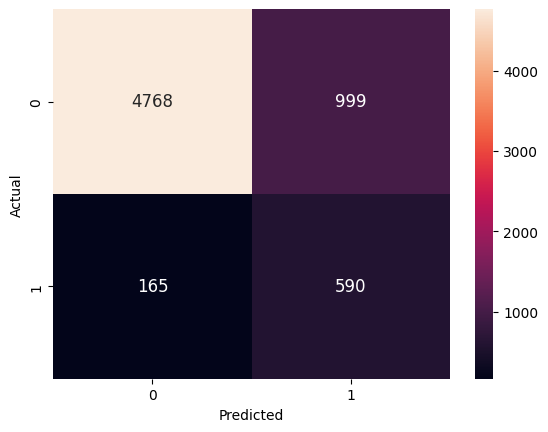

In [10]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, annot_kws={"size": 12}, fmt='d')

In [11]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

recall = metrics.recall_score(y_test, y_pred)
print('Sensitivity (Recall):', recall)

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
print ('Specificity: ', specificity)

Accuracy:  0.8215271389144434
Sensitivity (Recall): 0.7814569536423841
Specificity:  0.8267730189006416


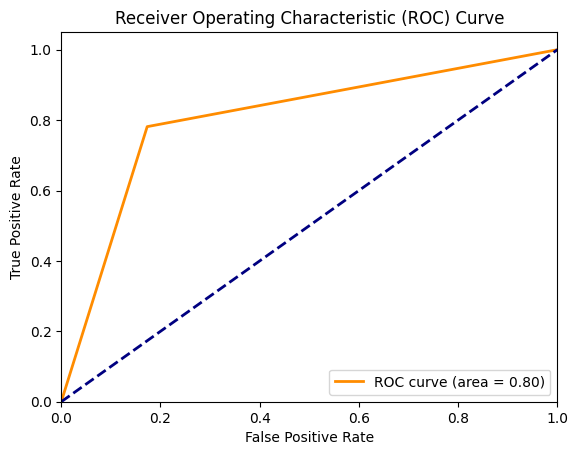

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [16]:
# Get feature importances from the trained XGBoost model
feature_importances = xgb_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or display the feature importances
print(feature_importance_df)

# You can also visualize the feature importances
# plt.figure(figsize=(10, 6))
# plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
# plt.xlabel('Importance')
# plt.ylabel('Feature')
# plt.title('Feature Importances')
# plt.show()

                                               Feature  Importance
67   DS_CID_INFECCAO AGUDA DAS VIAS AEREAS SUPERIOR...    0.151390
91          DS_CID_NASOFARINGITE AGUDA RESFRIADO COMUM    0.069309
134                              DS_CID_SINUSITE AGUDA    0.051496
36   DS_CID_BRONQUIOLITE AGUDA DEVIDA A VIRUS SINCI...    0.046746
23                             DS_CID_AMIGDALITE AGUDA    0.046449
..                                                 ...         ...
47                             DS_CID_COLAPSO PULMONAR    0.000000
45   DS_CID_BRONQUITE CRONICA SIMPLES E A MUCOPURUL...    0.000000
44                    DS_CID_BRONQUITE CRONICA SIMPLES    0.000000
43           DS_CID_BRONQUITE CRONICA NAO ESPECIFICADA    0.000000
71   DS_CID_INFLUENZA COM PNEUMONIA DEVIDA A OUTRO ...    0.000000

[143 rows x 2 columns]
